## Importing the required Python Libraries:





In [2]:
import pandas as pd 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

#Loading The Dataset


---



In [3]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Reading and making inferences from the dataset:

---



In [4]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value'] 
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

# Visualisation of Data:

---
The Pairplot gives us a pictorial representation between all the features in the dataset. 
A Histplot visualizes the frequency distribution of the median housing prices.
The Heatmap is an excelent way to check for the correlation between the features in the given dataset. 

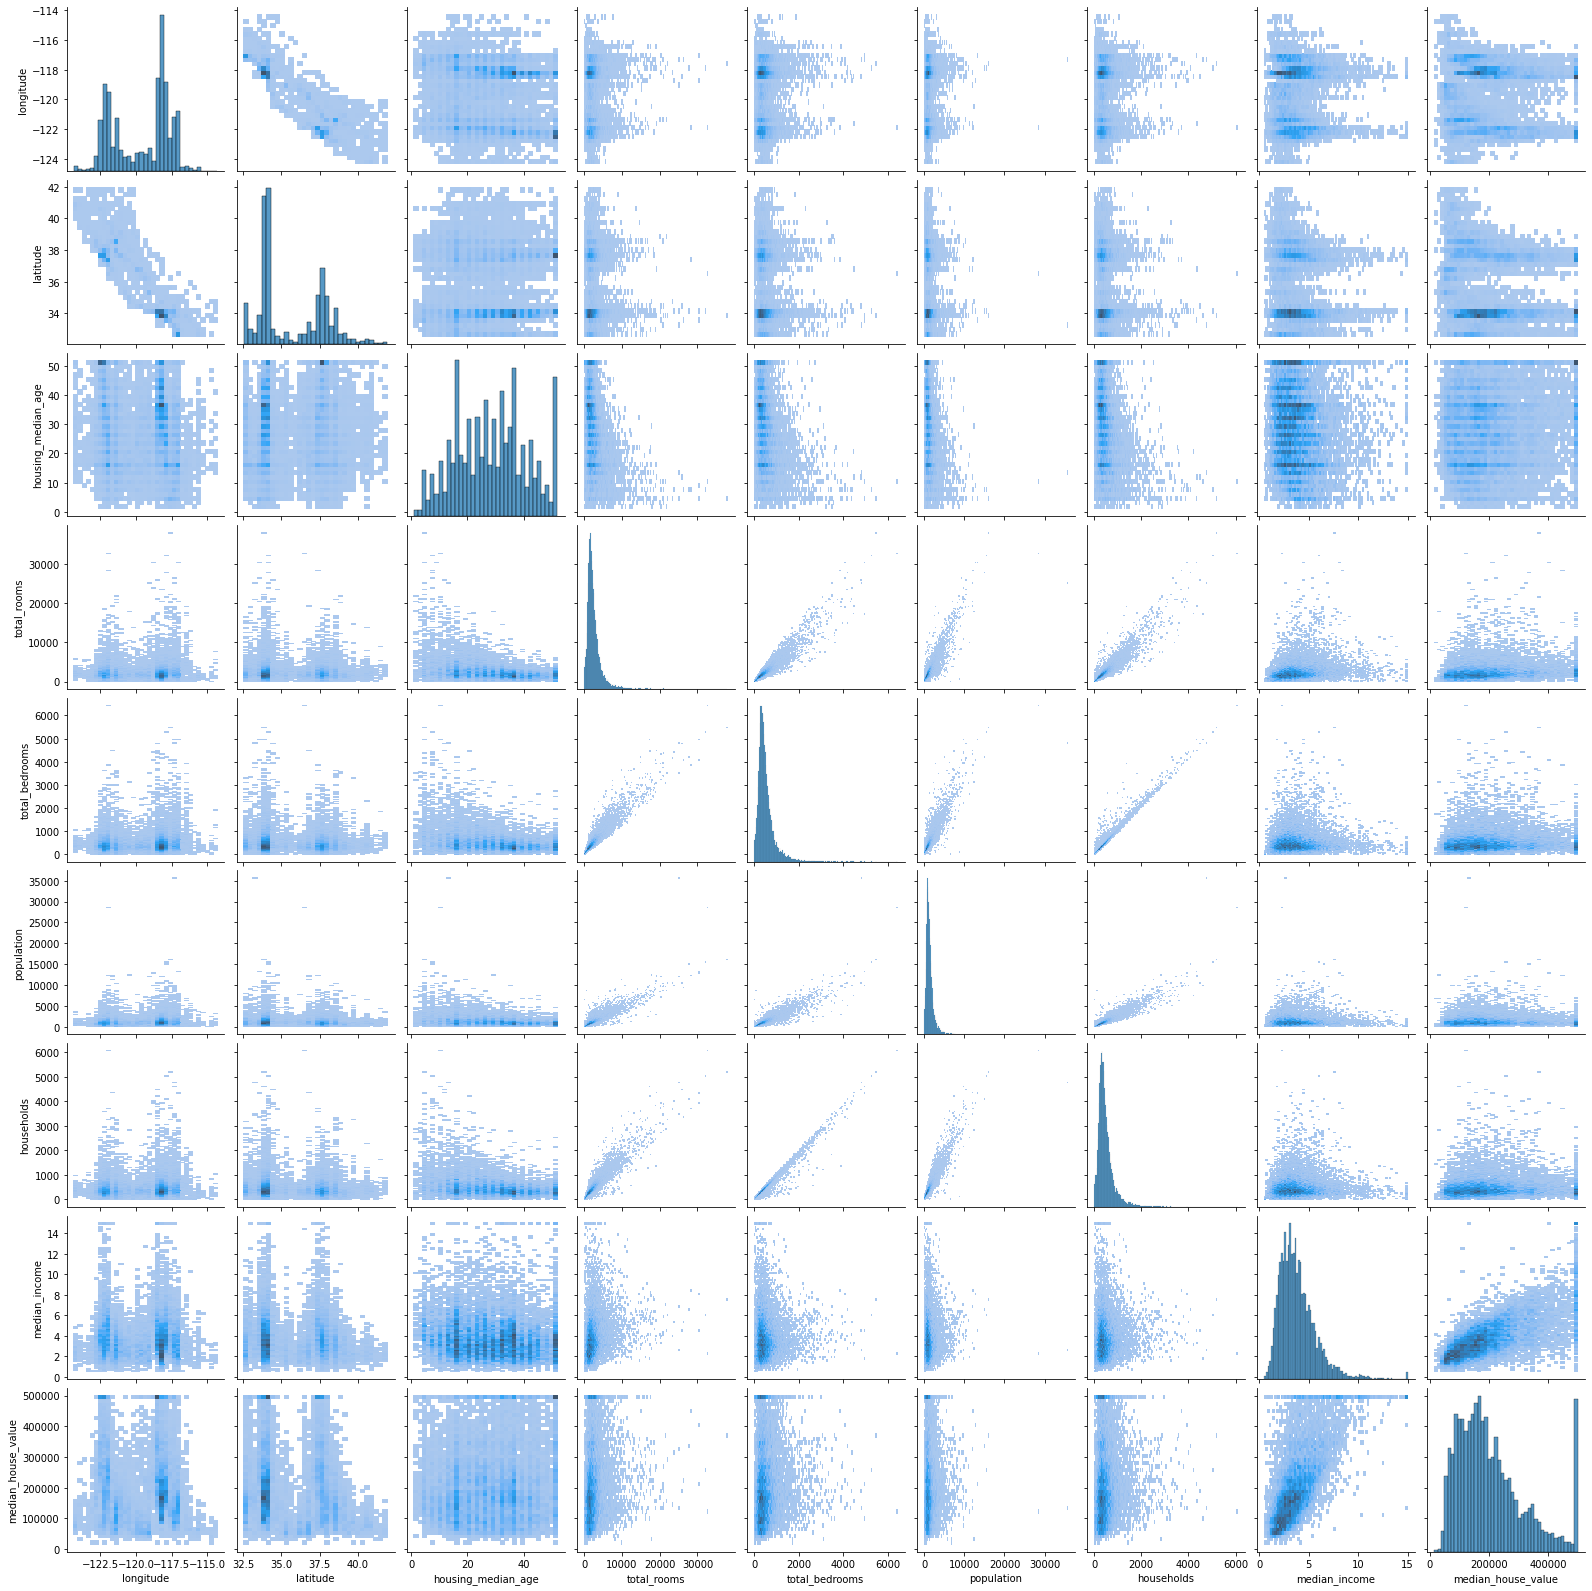

In [8]:

sns.pairplot(data=train_data, kind='hist')

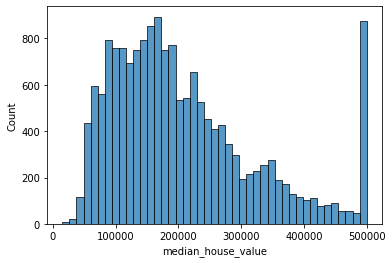

In [9]:
sns.histplot(train_data['median_house_value'])

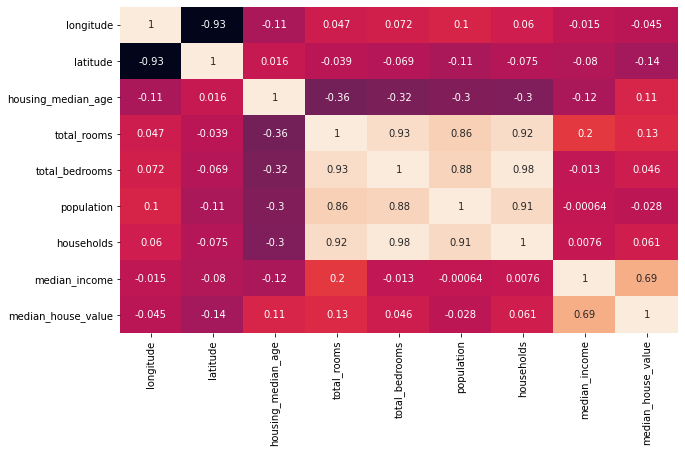

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot=True, cbar=None)

# Linear Regression:

---


In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Intercept:', linreg.intercept_)

Intercept: -3620600.8929739078


In [13]:
print('Coefficients:',linreg.coef_)

Coefficients: [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]


In [14]:
cdf = pd.DataFrame(linreg.coef_, X_train.columns, columns=['coeff'])

In [15]:
cdf.head()

,coeff
longitude,-43139.637258
latitude,-42925.673088
housing_median_age,1150.694932
total_rooms,-8.378251
total_bedrooms,117.648543


# Making Predictions:

---


In [16]:
y_pred = linreg.predict(X_test)

In [17]:
y_pred

array([352812.31112454, 212717.70074518, 272344.69951888, ...,
        88220.58643733, 146374.67481457, 456779.61107787])

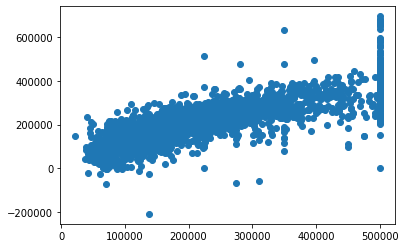

In [18]:
plt.scatter(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


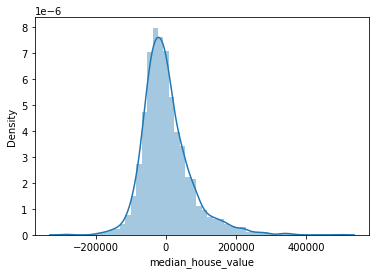

In [19]:
sns.distplot(y_test-y_pred, bins=50)

# Evaluating Metrics:

---



In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', linreg.score(X_train, y_train))

Mean Absolute Error: 50352.22825794297
Mean Squared Error: 4867205486.928806
Root Mean Squared Error: 69765.36022216761
Accuracy: 0.6413378529502686
